In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


import statsmodels.api as sm

In [32]:
df_main = pd.read_csv('merged_df.csv')
df_main.head()

,Unnamed: 0,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,...,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
0,0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,...,95.70,5.12,19410,333,514,1.715611,2.648120,8.5,12.8,20304
1,1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,...,91.34,5.27,69724,925,1429,1.326659,2.049509,8.6,13.8,73058
2,2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,...,91.34,5.27,11567,82,127,0.708913,1.097951,14.2,24.1,9145
3,3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,...,91.86,5.62,9508,119,184,1.251578,1.935212,10.9,17.0,7078
4,4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,...,91.86,5.62,21368,601,928,2.812617,4.342943,9.3,17.3,20934


In [33]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3140 non-null   int64  
 1   county_code        3140 non-null   int64  
 2   COUNTY             3140 non-null   object 
 3   STATEABBREVIATION  3140 non-null   object 
 4   YEAR               3140 non-null   int64  
 5   AMAT_fac           3140 non-null   float64
 6   HIVdiagnoses       3140 non-null   float64
 7   HIVincidence       3140 non-null   float64
 8   HIVprevalence      3140 non-null   float64
 9   MH_fac             3140 non-null   float64
 10  Med_AMAT_fac       3140 non-null   float64
 11  Med_MH_fac         3140 non-null   float64
 12  Med_SA_fac         3140 non-null   float64
 13  Med_SMAT_fac       3140 non-null   float64
 14  Med_TMAT_fac       3140 non-null   float64
 15  PLHIV              3140 non-null   float64
 16  Population         3140 

(0.0, 200.0)

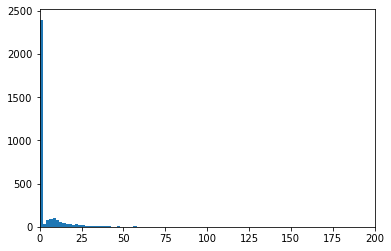

In [34]:
plt.hist(df_main['HIVincidence'], bins=400)
plt.xlim(left=0, right=200)
# plt.ylim(top=250);

In [35]:
df_main['HIVincidence'].describe()

count    3140.000000
mean        4.046911
std        16.575690
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       771.400000
Name: HIVincidence, dtype: float64

Vast majority of counties have an incidence rate of zero.

In [36]:
df_no_outliers = df_main[~((df_main['HIVincidence'] ==0) | (df_main['HIVincidence'] > 100))]

In [37]:
df_main.corr()['HIVincidence'].sort_values(ascending=False)

HIVincidence         1.000000
HIVprevalence        0.421939
HIVdiagnoses         0.267121
PLHIV                0.221498
bup_phys             0.196197
drugdeaths           0.195530
%msm12month          0.195191
%msm5yr              0.195110
household_income     0.192512
Population           0.185847
ADULTMEN             0.184088
Med_MH_fac           0.182766
MH_fac               0.181823
Med_SA_fac           0.176013
SMAT_fac             0.173340
MSM12MTH             0.169512
MSM5YEAR             0.169510
SA_fac               0.165988
TMAT_fac             0.165896
Med_SMAT_fac         0.148172
AMAT_fac             0.146125
num_SSPs             0.145353
Med_TMAT_fac         0.141801
unemployment_rate    0.132974
drugdep              0.118851
Med_AMAT_fac         0.115791
drugdeathrate        0.114383
poverty_rate         0.091102
partD30dayrxrate     0.090035
nonmedpain           0.066670
pctunins             0.051883
pctunmetneed         0.044500
mme_percap           0.041639
drugdeathr

In [38]:
df_no_outliers['HIVincidence'].describe()

count    745.000000
mean      15.861745
std       12.553282
min        1.500000
25%        7.400000
50%       11.500000
75%       21.300000
max       90.700000
Name: HIVincidence, dtype: float64

In [39]:
df_no_outliers.corr()['HIVincidence'].sort_values(ascending=False)


HIVincidence         1.000000
HIVprevalence        0.712629
poverty_rate         0.456296
pctunins             0.410541
unemployment_rate    0.341830
HIVdiagnoses         0.322255
PLHIV                0.310832
pctunmetneed         0.270963
drugdep              0.156056
%msm5yr              0.148199
%msm12month          0.148175
MSM5YEAR             0.146951
MSM12MTH             0.146950
bup_phys             0.113190
AMAT_fac             0.084436
nonmedpain           0.082629
household_income     0.071924
Population           0.070461
Med_MH_fac           0.067594
ADULTMEN             0.067525
MH_fac               0.064977
Med_SA_fac           0.061633
SMAT_fac             0.060142
partD30dayrxrate     0.057615
SA_fac               0.048230
Med_AMAT_fac         0.046140
num_SSPs             0.045063
Med_SMAT_fac         0.042629
TMAT_fac             0.041488
drugdeaths           0.033743
Med_TMAT_fac         0.023717
county_code         -0.038035
Unnamed: 0          -0.042873
drugdeathr

Possible columns to eliminate: HIV diagnoses, PLHIV, %msm12month, MSM12MTH, MSM5YEAR

In [48]:
y=df_no_outliers['HIVincidence']
X=df_no_outliers.drop(columns=['%msm12month', 'MSM12MTH', 'MSM5YEAR', 'PLHIV', 'YEAR','COUNTY','Unnamed: 0','STATEABBREVIATION','county_code','drugdeathrate_est','drugdeaths','mme_percap','HIVincidence'])


0       10.9
1        8.7
4       10.4
5       90.7
7       10.3
        ... 
3085    15.3
3089     3.3
3096     4.9
3098     6.0
3112     1.5
Name: HIVincidence, Length: 745, dtype: float64

wanted to go with inferential:
Inference: Use the model to learn about the data generation process.

In [ ]:
'''X = cars[["cylinders", "displacement", "horsepower", "weight", "acceleration", "american", "european", "asian"]]
y = cars["mpg"]

Do train test split
In [83]:

X_train, X_test, y_train, y_test = train_test_split(X,y)

Fit using training set.
In [84]:

model = LinearRegression()
model.fit(X_train, y_train)

Out[84]:

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predict using the test features.
In [85]:

yhat = model.predict(X_test)

Evaluate against the test target.
In [86]:

mse = mean_squared_error(y_test, yhat)
print(mse)
rmse = np.sqrt(mse)
print(rmse)'''



In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [52]:
y_pred=model.predict(X_test)

In [54]:
mse = mean_squared_error(y_test,y_pred)
mse

57.134067320026375

In [56]:
rmse=np.sqrt(mse)
rmse

7.558708045693151

In [58]:

X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           HIVincidence   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     53.39
Date:                Fri, 05 Mar 2021   Prob (F-statistic):          1.34e-148
Time:                        13:22:15   Log-Likelihood:                -2540.6
No. Observations:                 745   AIC:                             5135.
Df Residuals:                     718   BIC:                             5260.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -15.4155      9.54

In [61]:


import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
#from utils import XyScaler

In [63]:
Lasso = Lasso(alpha=0.5)
Lasso.fit(X_train, y_train)

/home/binu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15765.567053443408, tolerance: 8.38814859498208
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.5)

In [65]:
def rss(y, y_hat):
    return np.mean((y  - y_hat)**2)


preds = Lasso.predict(X_test)
mse = rss(y_test, preds)
print("MSE for Ridge(alpha=0.5): {:2.2f}".format(mse))



MSE for Ridge(alpha=0.5): 59.16


In [69]:
def cv(X, y, base_estimator, n_folds, random_seed=154):
    """Estimate the in and out-of-sample error of a model using cross validation.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    base_estimator: sklearn model object.
      The estimator to fit.  Must have fit and predict methods.
      
    n_folds: int
      The number of folds in the cross validation.
      
    random_seed: int
      A seed for the random number generator, for repeatability.
    
    Returns
    -------
      
    train_cv_errors, test_cv_errors: tuple of arrays
      The training and testing errors for each fold of cross validation.
    """
    kf = KFold(n_splits=n_folds, random_state=random_seed)
    test_cv_errors, train_cv_errors = np.empty(n_folds), np.empty(n_folds)
    for idx, (train_ind, test_ind) in enumerate(kf.split(X_train)):
        # Split into train and test
        X_cv_train, y_cv_train = X[train_ind], y[train_ind]
        X_cv_test, y_cv_test = X[test_ind], y[test_ind]
        # Standardize data.
        standardizer = XyScaler()
        standardizer.fit(X_cv_train, y_cv_train)
        X_cv_train_std, y_cv_train_std = standardizer.transform(X_cv_train, y_cv_train)
        X_cv_test_std, y_cv_test_std = standardizer.transform(X_cv_test, y_cv_test)
        # Fit estimator
        estimator = clone(base_estimator)
        estimator.fit(X_cv_train_std, y_cv_train_std)
        # Measure performance
        y_hat_train = estimator.predict(X_cv_train_std)
        y_hat_test = estimator.predict(X_cv_test_std)
        # Calclate the error metrics
        train_cv_errors[idx] = rss(y_cv_train_std, y_hat_train)
        test_cv_errors[idx] = rss(y_cv_test_std, y_hat_test)
    return train_cv_errors, test_cv_errors


In [70]:
n_folds = 10
train_cv_errors, test_cv_errors = cv(X_train.values, y_train.values, 
                                     Lasso(alpha=0.5), n_folds=n_folds)



TypeError: 'Lasso' object is not callable

In [66]:
def train_at_various_alphas(X, y, model, alphas, n_folds=10, **kwargs):
    """Train a regularized regression model using cross validation at various values of alpha.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    model: sklearn model class
      A class in sklearn that can be used to create a regularized regression object.  Options are `Ridge` and `Lasso`.
      
    alphas: numpy array
      An array of regularization parameters.
      
    n_folds: int
      Number of cross validation folds.
      
    Returns
    -------
    
    cv_errors_train, cv_errors_test: tuple of DataFrame
      DataFrames containing the training and testing errors for each value of 
      alpha and each cross validation fold.  Each row represents a CV fold,
      and each column a value of alpha.
    """
    cv_errors_train = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                     columns=alphas)
    cv_errors_test = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                        columns=alphas)
    for alpha in alphas:
        train_fold_errors, test_fold_errors = cv(X, y, model(alpha=alpha, **kwargs), n_folds=n_folds)
        cv_errors_train.loc[:, alpha] = train_fold_errors
        cv_errors_test.loc[:, alpha] = test_fold_errors
    return cv_errors_train, cv_errors_test

In [67]:
lasso_alphas = np.logspace(-3, 1, num=250)

lasso_cv_errors_train, lasso_cv_errors_test = train_at_various_alphas(
    X_train.values, y_train.values, Lasso, lasso_alphas, max_iter=5000)

NameError: name 'cv' is not defined

In [ ]:
def get_optimal_alpha(mean_cv_errors_test):
    alphas = mean_cv_errors_test.index
    optimal_idx = np.argmin(mean_cv_errors_test.values)
    optimal_alpha = alphas[optimal_idx]
    return optimal_alpha

ridge_optimal_alpha = get_optimal_alpha(ridge_mean_cv_errors_test)


